In [1]:
import numpy
import cv2
from matplotlib import pyplot
from skimage import feature
import math
import os
import pywt
from sklearn.model_selection import train_test_split
import sklearn.svm as sksv

In [2]:
def localbinarypatternextraction(im,nump,radi):
    np=nump
    rs=radi
    eps=1e-10
    lbp=feature.local_binary_pattern(im,np,rs,method="uniform")
    (hist,_)=numpy.histogram(lbp.ravel(),bins=numpy.arange(0,np+3),range=(0,np+2))
    hist=hist.astype("float")
    hist=hist/(hist.sum()+eps)
    return hist

In [49]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')


def extract_feature_and_label(nump,radi):
    i=0
    j=0
    data=[]
    label=[]
    
    for dirs in os.listdir('proorefine_dataset'):
        for name in os.listdir('proorefine_dataset/'+dirs):
            im=cv2.imread('proorefine_dataset/'+dirs+'/'+name)
            
            gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
            
            faces = face_cascade.detectMultiScale(gray, 1.3, 5)
            
            for (x,y,w,h) in faces:
                roi_gray = gray[y:y+h, x:x+w]
                resize = cv2.resize(roi_gray,(150,150),interpolation=cv2.INTER_AREA)
                hist=localbinarypatternextraction(roi_gray,nump,radi)
                data.append(hist)
                if(int(dirs)<20):
                    label.append(0)
                elif(int(dirs)<50):
                    label.append(1)
                else:
                    label.append(2)
        
        print(dirs)
    
    return (data,label)

In [76]:
radi = 2
nump = 32 * radi
print(nump)
(data,label)=extract_feature_and_label(nump,radi)

64
1
10
100
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
3
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
5
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
7
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
9
90
91
92
93
94
95
96
97
98
99


In [77]:
data = numpy.array(data)
label = numpy.array(label)
print(data.shape)
print(label.shape)

(10884, 66)
(10884,)


In [78]:
y = numpy.zeros((data.shape[0], 3))
y[numpy.arange(10884), label] = 1
print(y[10880])
print(y.shape)

[ 0.  0.  1.]
(10884, 3)


In [79]:
from keras.layers import Dropout, Input,Dense
from keras.models import Model

input_feacture_vector =  Input(shape=(66,),name='input_layer')
h1 = Dense(128, activation='relu',name='h1')(input_feacture_vector)
h2 = Dense(128, activation='relu',name='h2')(h1)
Y = Dense(3, activation='softmax',name='output_layer')(h2)


model = Model(input_feacture_vector,Y)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     (None, 66)                0         
_________________________________________________________________
h1 (Dense)                   (None, 128)               8576      
_________________________________________________________________
h2 (Dense)                   (None, 128)               16512     
_________________________________________________________________
output_layer (Dense)         (None, 3)                 387       
Total params: 25,475
Trainable params: 25,475
Non-trainable params: 0
_________________________________________________________________


In [80]:
from keras import optimizers

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

In [72]:
model.fit(data,y,epochs=7000,batch_size=32,verbose=2)

Epoch 1/7000
 - 1s - loss: 0.7302 - acc: 0.7150
Epoch 2/7000
 - 0s - loss: 0.6990 - acc: 0.7176
Epoch 3/7000
 - 0s - loss: 0.6966 - acc: 0.7176
Epoch 4/7000
 - 0s - loss: 0.6941 - acc: 0.7176
Epoch 5/7000
 - 0s - loss: 0.6950 - acc: 0.7176
Epoch 6/7000
 - 0s - loss: 0.6932 - acc: 0.7176
Epoch 7/7000
 - 0s - loss: 0.6890 - acc: 0.7176
Epoch 8/7000
 - 0s - loss: 0.6888 - acc: 0.7175
Epoch 9/7000
 - 0s - loss: 0.6851 - acc: 0.7175
Epoch 10/7000
 - 0s - loss: 0.6853 - acc: 0.7155
Epoch 11/7000
 - 0s - loss: 0.6831 - acc: 0.7167
Epoch 12/7000
 - 0s - loss: 0.6821 - acc: 0.7167
Epoch 13/7000
 - 0s - loss: 0.6802 - acc: 0.7161
Epoch 14/7000
 - 0s - loss: 0.6804 - acc: 0.7158
Epoch 15/7000
 - 0s - loss: 0.6767 - acc: 0.7173
Epoch 16/7000
 - 0s - loss: 0.6759 - acc: 0.7172
Epoch 17/7000
 - 0s - loss: 0.6773 - acc: 0.7154
Epoch 18/7000
 - 0s - loss: 0.6728 - acc: 0.7178
Epoch 19/7000
 - 0s - loss: 0.6733 - acc: 0.7188
Epoch 20/7000
 - 0s - loss: 0.6727 - acc: 0.7167
Epoch 21/7000
 - 0s - loss: 0

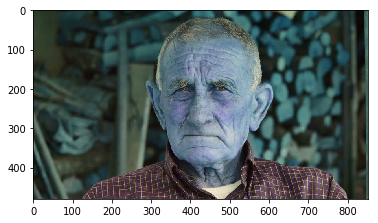

out : [[  2.01624553e-05   1.32519221e-02   9.86727893e-01]]
class : 2


In [74]:
im=cv2.imread('old.jpg')
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

import matplotlib.pyplot as plt
plt.imshow(im)
plt.show()

for (x,y,w,h) in faces:
    roi_gray = gray[y:y+h, x:x+w]
    hist=localbinarypatternextraction(roi_gray,nump,radi)
    resize = cv2.resize(roi_gray,(150,150),interpolation=cv2.INTER_AREA)
    hist = numpy.array(hist)
    hist = hist.reshape((1,34))
    out = model.predict(hist)
    print('out : '+ str(out))
    maxid  = numpy.argmax(out)
    print('class : '+ str(maxid))
    
    
    

In [75]:
from keras.models import save_model
import h5py

save_model(model,'v2_7000epoch_class_012_loss_0543_acc_9816_imagesize150x150_r2_p16.h5py')

In [34]:
svc =sksv.SVC(gamma=100,C=800)
svc.fit(data,label)

SVC(C=800, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [35]:
svc.score(data,label)

0.62247335538405002

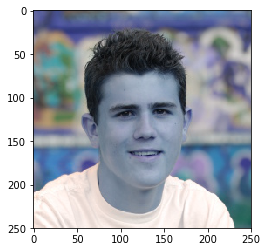

out : ['18']


In [42]:
im=cv2.imread('young.jpg')
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

import matplotlib.pyplot as plt
plt.imshow(im)
plt.show()

for (x,y,w,h) in faces:
    roi_gray = gray[y:y+h, x:x+w]
    hist=localbinarypatternextraction(roi_gray,nump,radi)
    hist = numpy.array(hist)
    hist = hist.reshape((1,52))
    out = svc.predict(hist)
    print('out : '+ str(out))
    


In [45]:
for dirs in os.listdir('dataset7/proorefine_dataset'):
    for name in os.listdir('dataset7/proorefine_dataset/'+dirs):
        im=cv2.imread('dataset7/proorefine_dataset/'+dirs+'/'+name)

        gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

        faces = face_cascade.detectMultiScale(gray, 1.3, 5)

        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            hist=localbinarypatternextraction(roi_gray,nump,radi)
            hist = numpy.array(hist)
            hist = hist.reshape((1,52))
            out = svc.predict(hist)
            
            print(dirs + ' out : '+ str(out)) 

10 out : ['27']
10 out : ['17']
10 out : ['35']
10 out : ['25']
10 out : ['34']
10 out : ['27']
10 out : ['22']
10 out : ['23']
10 out : ['32']
10 out : ['46']
10 out : ['53']
10 out : ['42']
10 out : ['56']
10 out : ['28']
10 out : ['55']
10 out : ['56']
10 out : ['25']
10 out : ['33']
10 out : ['32']
10 out : ['46']
10 out : ['75']
10 out : ['31']
10 out : ['24']
10 out : ['24']
10 out : ['25']
10 out : ['29']
10 out : ['37']
10 out : ['52']
10 out : ['32']
10 out : ['23']
11 out : ['41']
11 out : ['23']
11 out : ['42']
11 out : ['25']
11 out : ['27']
11 out : ['46']
11 out : ['62']
11 out : ['28']
11 out : ['30']
11 out : ['43']
11 out : ['26']
11 out : ['55']
11 out : ['18']
11 out : ['32']
11 out : ['58']
11 out : ['24']
11 out : ['27']
11 out : ['21']
11 out : ['34']
11 out : ['56']
11 out : ['88']
11 out : ['36']
11 out : ['46']
11 out : ['22']
11 out : ['18']
11 out : ['27']
11 out : ['54']
11 out : ['21']
11 out : ['29']
11 out : ['35']
11 out : ['33']
11 out : ['20']
11 out :

KeyboardInterrupt: 

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
y_train1=(y_train==1).astype("int")
y_train2=(y_train==2).astype("int")
y_train3=(y_train==3).astype("int")

NameError: name 'X' is not defined

In [62]:
im=cv2.imread('/home/satty/folder/Ronaldo3.jpg',0)
im=face_extraction(im)
im=localbinarypatternextraction(im,nump,radi)
im=im.reshape(1,-1)
supp1=sksv.SVC(gamma=100,C=800)
supp1.fit(X_train,y_train1)
y=supp1.predict(X_test)
print(sum(sum(y_test==1)))
print(sum(y==1))
s11=supp1.score(X_train,y_train1)
s12=supp1.score(X_test,y_test==1)
print(s11)
print(s12)
supp2=sksv.SVC(gamma=100,C=300)
supp2.fit(X_train,y_train2)
y=supp2.predict(X_test)
print(sum(sum(y_test==2)))
print(sum(y==1))
s21=supp2.score(X_train,y_train2)
s22=supp2.score(X_test,y_test==2)
print(s21)
print(s22)
supp3=sksv.SVC(gamma=200,C=1000)
supp3.fit(X_train,y_train3)
y=supp3.predict(X_test)
print(sum(sum(y_test==3)))
print(sum(y==1))
s31=supp3.score(X_train,y_train3)
s32=supp3.score(X_test,y_test==3)
print(s31)
print(s32)
print(numpy.argmax((supp1.decision_function(im),supp2.decision_function(im),supp3.decision_function(im))))

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


106
115
0.9784106568672485
0.871900826446281
549
618
0.9255856683509417
0.8085399449035813
71
62
0.998162609095085
0.8443526170798898
0
